# Multivariate Linear Regression

This question is intended to help you understand the application of linear regression for datasets with multiple variables. When predicting an outcome, we usually take a few factors into consideration. For example, to predict today’s weather, we do not only use season as the only factor – we consider other things like humidity, precipitation, and even the level of pollution in the city. When working with multiple variables, data standardization is necessary if the variance between features is different. Otherwise, the results can be highly misleading. For example, it matters if weight is provided in kilograms or grams. Rescaling will fix this.

1.	Data correlation.

a.	Load the raw Diabetes CSV file onto your notebook, which its data has not been standardized (file: diabetes_raw.csv). Create separate dataframes for the target variable (“Y”) and the input variables (all columns except “Y”). Examine the correlation properties between the input variables by plotting a correlation heatmap using the Pandas corr() function and the Seaborn heatmap() function. (1P)

Solution:

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set to display plots inline
%matplotlib inline

# set to adjust figure size
sns.set(rc = {'figure.figsize':(15,8)})

In [2]:
# load dataset

df_diabetes_raw = pd.read_csv('/content/diabetes_raw.csv')
df_diabetes_raw.head()

AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135

In [3]:
# remove column Y from the dataframe and assign it as variable df_y

df_y = df_diabetes_raw.pop('Y')
df_y.head()

0    151
1     75
2    141
3    206
4    135
Name: Y, dtype: int64

In [4]:
# assign the rest of the columns as variable df_X

df_X = df_diabetes_raw
df_X.head()

AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80

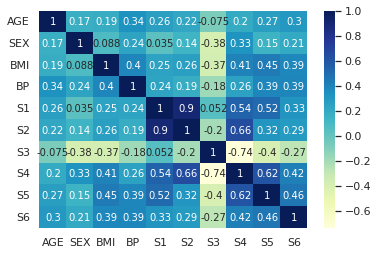

In [5]:
# plot correlation of df_X

X_correlation = df_X.corr()
hm = sns.heatmap(X_correlation, cmap="YlGnBu", annot=True)

b.	Observe the variable “S3” (high-density lipoproteins) at the correlation plot. Which variable has the strongest positive correlation with it, and which variable has the strongest negative correlation with it? (1P)

Solution:

- Variable "S3" has the strongest positive correlation with itself (value 1).
- Variable "S3" has the strongest negative correlation with variable "S4" (value -0.74).

2.	Data standardization.

a.	Read this article to learn more about when and why we need to standardize variables in a regression model: https://statisticsbyjim.com/regression/standardize-variables-regression/. (1P)

b.	Scale the range of the Diabetes dataset using the Sklearn StandardScaler() function. Perform two linear regression analysis using the Statsmodels OLS function: one for the standardized, and one for the non-standardized datasets. Which differences do you observe at the outcome summary? Explain the reasons behind these differences. (2P)

Solution:

In [6]:
# import libraries

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
# scale dataset

scaler = StandardScaler()
scaled_df_X = scaler.fit_transform(df_X)
scaled_df_X

array([[ 0.80050009,  1.06548848,  1.29708846, ..., -0.05449919,
         0.41853093, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, ..., -0.83030083,
        -1.43658851, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, ..., -0.05449919,
         0.06015558, -0.54515416],
       ...,
       [ 0.87686984,  1.06548848, -0.33441002, ..., -0.23293356,
        -0.98564884,  0.32567395],
       [-0.9560041 , -0.93853666,  0.82123474, ...,  0.55838411,
         0.93616291, -0.54515416],
       [-0.9560041 , -0.93853666, -1.53537419, ..., -0.83030083,
        -0.08875225,  0.06442552]])

In [8]:
# linear regression with non-standardized data

X = sm.add_constant(df_X)
model = sm.OLS(df_y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 03 May 2022   Prob (F-statistic):           3.83e-62
Time:                        18:05:39   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -334.5671     67.455     -4.960      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [9]:
# linear regression with standardized data

X = sm.add_constant(scaled_df_X)
model = sm.OLS(df_y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 03 May 2022   Prob (F-statistic):           3.83e-62
Time:                        18:05:39   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

- The condition number of the linear regresssion model of non-standardized data is large, 7.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
- Condition Number measures the sensitivity of a function's output as compared to its input. When we have multicollinearity, we can expect much higher fluctuations to small changes in the data. So, a small Condition Number value is better (smaller fluctuation of output to changes in the input).
- After data standardization, the condition number of the linear regression model of standardized data is 21.7. 
- Data standardization has reduced multi-collinearity in the dataset.
- Description of condition number according to Statsmodel documentation: Calculated as ratio of largest to smallest singular value of the exogenous variables. This value is the same as the square root of the ratio of the largest to smallest eigenvalue of the inner-product of the exogenous variables.


3.	Data transformation.

a.	One of the important assumptions of linear regression is that the model residuals are normally distributed. There are some data transformation techniques to fix the issue of non-normality of model residuals, such as the Box-Cox transformation. Explain how this technique works. State one of the benefits of transforming non-normal variables into a normal shape. (2P)

Solution:

- Box-Cox transformation is a technique to convert non-normal dependent variables or model residuals into a normal shape.
- The core component of a Box-Cox transformation is an exponent (Lambda), with a range between -5 and 5. All values of Lambda will be considered for the data and optimal value will be chosen. The optimal value of Lambda will result in the best approximation of a distribution curve.
- Normality is an important assumption for many types of tests. One of the benefit of transforming non-normal variables into a normal shape is to be able to run a broader number of tests, which assume normally distributed data as a prerequisite.

4.	Confounding variables.

a.	The presence of confounding variables affects the variables being studied, which causes the result to not reflect the actual relationship between the variables. Read this article to learn more about confounding variables: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/. (1P)

b.	Briefly describe how would you use linear regression to adjust for the confounding effects of age and gender in the Diabetes dataset. (1P)

Solution:

- We can implement multiple linear regression for the Diabetes dataset while adjusting for the Age and Sex variables by making them covariates and compare the results with the simple linear regression model (without taking into account for confounders). 
- For example, we want to see the relationship between the Body Mass Index (BMI) and the outcome Y (quantitative measure of disease progression one year after baseline). Age and Sex might be potential confounding variables. We implement a simple linear regression model taking only BMI and Y into account. Then, implement a multiple linear regression model, taking BMI as input (X1), and on top of that, adding Age and Sex as covariates (X2 and X3). We then compare the results of simple and multiple linear regressions to see how much the coefficient and p-value of BMI changes after adjusting for these two potential confounders in the model. If the inclusion confounders (Age and Sex) causes the association between the primary risk factor (BMI) and the outcome (Y) to change by 10% or more, then Age and Gender are confounders.